In [1]:
import os 
import pydicom

dcm_path = "../datasets/Duke-Breast-Cancer-MRI/Breast_MRI_001/01-01-1990-NA-MRI BREAST BILATERAL WWO-97538/3.000000-ax dyn pre-93877/1-002.dcm"


dicom_data = pydicom.dcmread(dcm_path)

pixel_array = dicom_data.pixel_array
print(pixel_array.shape)



(448, 448)


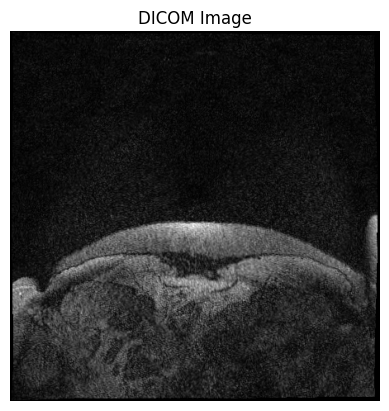

In [2]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(pixel_array, cmap="gray")
plt.title("DICOM Image")
plt.axis("off")
plt.show()

Series reading

In [4]:
import os

# Specify the folder path
folder_path = "../datasets/Duke-Breast-Cancer-MRI/Breast_MRI_001/01-01-1990-NA-MRI BREAST BILATERAL WWO-97538/3.000000-ax dyn pre-93877"

# List all files and folders in the directory
entries = os.listdir(folder_path)

# Filter only files (optional)
files = [entry for entry in entries os.path.join(folder_path, entry)]

print(entries)

# print("Files in the folder:")
# for file in files:
#     print(file)

['1-028.dcm', '1-134.dcm', '1-111.dcm', '1-061.dcm', '1-126.dcm', '1-105.dcm', '1-022.dcm', '1-150.dcm', '1-049.dcm', '1-153.dcm', '1-075.dcm', '1-026.dcm', '1-064.dcm', '1-037.dcm', '1-089.dcm', '1-038.dcm', '1-139.dcm', '1-034.dcm', '1-057.dcm', '1-043.dcm', '1-076.dcm', '1-103.dcm', '1-107.dcm', '1-014.dcm', '1-114.dcm', '1-062.dcm', '1-021.dcm', '1-157.dcm', '1-070.dcm', '1-123.dcm', '1-152.dcm', '1-042.dcm', '1-082.dcm', '1-019.dcm', '1-141.dcm', '1-122.dcm', '1-002.dcm', '1-140.dcm', '1-090.dcm', '1-035.dcm', '1-106.dcm', '1-135.dcm', '1-086.dcm', '1-001.dcm', '1-058.dcm', '1-036.dcm', '1-008.dcm', '1-121.dcm', '1-094.dcm', '1-029.dcm', '1-046.dcm', '1-151.dcm', '1-124.dcm', '1-143.dcm', '1-030.dcm', '1-068.dcm', '1-100.dcm', '1-149.dcm', '1-145.dcm', '1-142.dcm', '1-095.dcm', '1-108.dcm', '1-146.dcm', '1-099.dcm', '1-048.dcm', '1-092.dcm', '1-154.dcm', '1-065.dcm', '1-096.dcm', '1-119.dcm', '1-044.dcm', '1-148.dcm', '1-112.dcm', '1-128.dcm', '1-083.dcm', '1-013.dcm', '1-085.dcm'

In [ ]:
from torch.utils.data import Dataset, DataLoader
import os 
import pydicom

dataset_path = "/home/hice1/ygu367/ECE6780/project_group5/datasets/Duke-Breast-Cancer-MRI"

class MRI3DDataset(Dataset):
    def __init__(self, subject_paths, transform=None):
        """
        subject_paths: list of folders (for DICOM) or list of NIfTI file paths
        transform: optional transform (e.g., augmentations)
        """
        self.subject_paths = subject_paths
        self.transform = transform

    def __len__(self):
        return len(self.subject_paths)

    def __getitem__(self, idx):
        dcm_path = self.subject_paths[idx]
        dicom_data = pydicom.dcmread(dcm_path)

        pixel_array = dicom_data.pixel_array
        
        volume_tensor = torch.tensor(pixel_array, dtype=torch.float32)
        
        if self.transform:
            volume_tensor = self.transform(volume_tensor)
        
        return volume_tensor
